# On the use of test statistics

This notebook is born out of my (Michael's) confusion related to the emphasis on test statistics and calculating p-values with the test statistics in this paper https://arxiv.org/pdf/1007.1727.pdf. 

As I understand it, the point of this paper is how to determine p-values and significance in the face of nuisance parameters. In this notebook, I explore their methods for calculating p-values from the distribution of the log-generalized-likelihood-ratio and examine an alternate way to deal with nuissance parameters.

In [1]:
# Import python code to clean up this notebook

from my_stats_code import *

# Hypothesis Testing for Poisson Distributions

For concreteness, let us write the Poisson distribution as
$$ f(N_o, N_e) = \frac{N_e^{N_o} e^{-N_e}}{N_o!}$$
where $N_o$ is the number of observed events and $N_e$ is the expected number of events.
We wish to test two hypotheses; $H_0$, the background only or null hypothesis, and $H_1$, the signal and background or alternative hypothesis. Let us consider a generalized hypothesis $H_\mu$ defined by the observed number of events under the Poisson distribution with the expected number of events $N_e = N_b + \mu N_s$ where $\mu=0$ coincides with the background only hypothesis and $\mu > 0$ coincides with the signal and background hypothesis. If $N_b$ is well known, the task of hypothesis testing is really simple. The critical region of the most powerful test is guaranteed to be $w = \{N > N_\alpha\}$ by the Neyman-Pearson lemma. $N_\alpha$ is easily determined by demanding that the statistical significance of the test is $\alpha$, or more formally
$$ \alpha = \sum_{N > N_\alpha} f(N_o, N_b), $$
i.e. $\alpha$ is the probability that the test incorrectly identifies the null hypotheis as false.

I would like to emphasize that the above discussion is different than the statistics of the $\hat{p}$-value and significance of a measurement that we commonly use to report data. The above discussion is about making a decision based on the data while the $\hat{p}$-value and significance are about making an agnosistic statement which informs a reader how seriously they should take the measurement.

There is another issue with the above discussion that we have not discussed. The likelihood of the hypotheses depended entirely on a known value of $N_b$. In our case, we have rather large Monte-Carlo uncertainty for the value of $N_b$. There is not an obvious way to deal with this problem. Below, I will discuss a possible method.

## $\hat{p}$-values and significance

The $\hat{p}$-value is the probability of measuring data at least as extreme as the measured value under the assumption of the null hypothesis. It is not a maleable figure without changing what one means by the null hypothesis. 

In the simple case where the background rate is known, our $\hat{p}$-value is
$$\hat{p}(N_o) = \sum_{N > N_o} f(N_o, N_b).$$
Note that this definition is nearly identical to the above defintion of the test significance $\alpha$. This is because the difference between the two is completely philosophical. Test significance is about setting a critical region for deciding the truth of a hypothesis *before* the measurement has been made. The $\hat{p}$-value is about the probability of the data *after* the measurement has been made. In a significance test, the null hypothesis is rejected if the measured $\hat{p}$-value is below some preordained value of $\alpha$.

The value of $\alpha$, the significance of a test, is also different than what we mean by the significance of a measurement in partilce physics. In particle physics, the significance of a measurement is the number of standard deviations of a Gaussian associated with the measured $\hat{p}$-value. That is the significance of a measurment is 
$$ Z = \Phi^{-1}(1-\hat{p}) $$
where $\Phi$ is the cummulative distribution function for a Gaussian.

Let us breifly illustrate these statistics in this simple case before trying to discuss the more complicated problem of determining $\hat{p}$-values when nuissance parameters are taken into account.

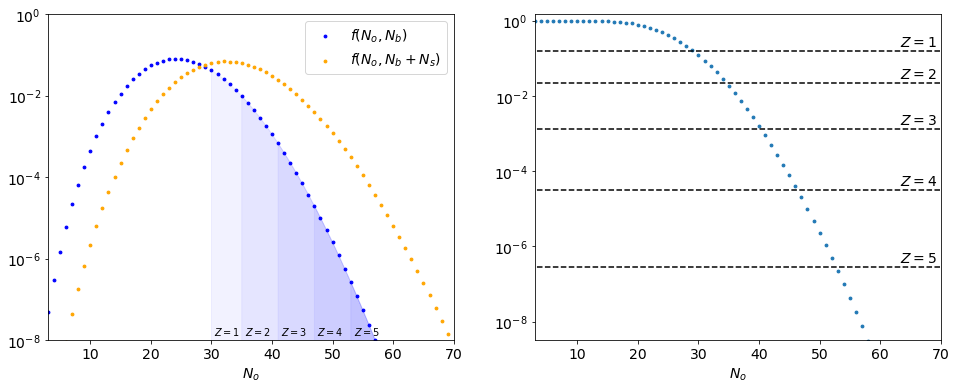

In [2]:
plot_poisson_pvals(Ns=8.23, Nb=24.65)

The plot on the left side gives the two Poisson distributions for the background and signal + background distributions with the shaded regions illustrating the area corresponding to the $\hat{p}$-value of the observation for certain levels of the significance. The plot on the right side gives the $\hat{p}$-value of differ observations with the dashed lines showing the $\hat{p}$-values corresponding to various levels of significance.

### Estimating $\hat{p}$-values

It is often the case that the likelihood is more complicated to calculate than in the above scenario. https://arxiv.org/pdf/1007.1727.pdf provides methods to estimate the $\hat{p}$-value of given observations by considering the generalized-likelihood-ratio.

Let us briefly comment on the likelihood-ratio
$$ \lambda_\mathrm{LR}(N_o) = \frac{L(N_o | H_0)}{L(N_o | H_1)}.$$
This is the value considered by the Neyman-Pearson lemma to determine the most powerful critical region for a significance test. From the likelihood-ratio above, one could solve for the $\hat{p}$-value by determining how the test statistics ($\lambda_\mathrm{LR}$ in this scenario) is distributed under the null hypothesis
$$ \hat{p}(N_o) = \sum_{N > N_o} f(N | H_0) = \sum_{N > N_o} \tilde f(\lambda_\mathrm{LR}(N)) $$
where
$$\tilde f(\lambda_\mathrm{LR}) = f(N) \frac{dN}{d\lambda_\mathrm{LR}} $$
is the induced pdf on $\lambda_\mathrm{LR}(N)$ by the pdf on $N$. Similar formulas hold for any test statistic.
This procedure is typically more cumbersome to calculate that just calculate $\hat{p}(N_o)$ from the distribution on $N$, $f(N | H_0)$. However, in some cases, the distribution on the test statistic can be known or well approximated. This is how https://arxiv.org/pdf/1007.1727.pdf calculates $\hat{p}$-values. Specifically, they consider the generalized-likelihood-ratio
$$ \lambda_\mathrm{GLR}(N_0) = \frac{\sup_{\theta \in \Omega_0} L(N_o | \theta)}{\sup_{\theta \in \Omega} L(N_o | \theta)} $$
where $\sup_{\theta \in \Omega_0} L(N_o | \theta)$ means the maximum likelihood for parameters $\theta$ in the parameter space of the null hypothesis $\Omega_0$ while $\sup_{\theta \in \Omega} L(N_o | \theta)$ is the maximum likelihood over the whole parameter space $\Omega$. Then we can leverate the fact that the distribution of $q(N_0) = -2 \log \lambda_\mathrm{GLR}(N_o)$ converges to the chi-square distribution. Then you can estimate the $\hat{p}$-value by calculating
$$ \tilde{p}(N_o) = \int_{q(N_o)}^\infty \chi^2(q) dq $$
where $\chi^2(q)$ is the chi-square distribution for one degree of freedom. As $\tilde f(q(N))$ converges to $\chi^2(q(N))$ for large values of $N$, we approximate $\hat{p}(N_o) \lesssim \tilde{p}(N_o)$.

To see this, let us look consider the generalized-likelihood-ratio of the simple situation where
$$ \lambda_\mathrm{GLR}(N_o) = \frac{f(N_o | N_b)}{\sup_{\mu} f(N_o, \mu N_s + N_b)}. $$

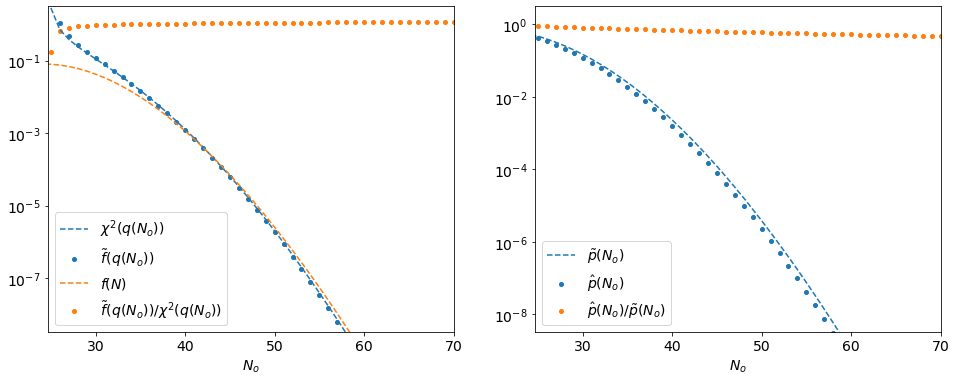

In [3]:
plot_poisson_qstat(Ns=8.23, Nb=24.65)

### Nuissance Parameters

Nuissance parameters are parameters in the model which are not tested by the hypothesis. In our case, the main nuissance parameter is the MC uncertainty of $N_b$. There are variety of ways we may deal with this uncertainty. Following https://arxiv.org/pdf/1007.1727.pdf, one may be enticed to try the generalized-likelihood-ratio and maximize over the nuissance parameter; however, this will not work for one bin because the nuissance parameter is redundant with $\mu$. Therefore maximizing over the nuissance parameter will set the likelihood ratio one no matter the observed value of $N_o$. Instead, we choose to deal with the uncertainty by  marginalizing the likelihood with a Gaussian prior on the background rate $N_b$, i.e.
$$ L(N_o | \mu) = \int_0^\infty f(N_o, \mu N_s + b) \times \frac{1}{\sqrt{2\pi \sigma_b^2}} \exp \left (-\frac{(b-\mu_b)^2}{2\sigma_b^2} \right ) db.$$

Now we can introduce uncertainty in the $N_b$ parameter and calculate the $\hat{p}(N_o)$ values.

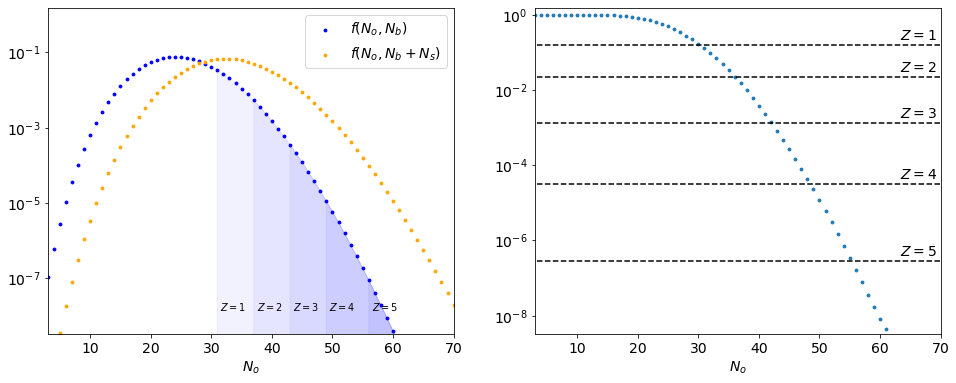

In [4]:
plot_marginal_pvals(Ns=8.23, Nb=24.65, db=1.4)

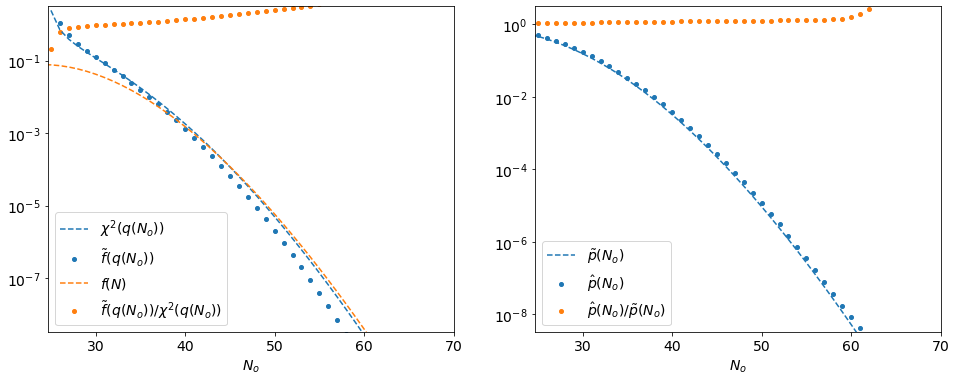

In [5]:
plot_marg_qstat(Ns=8.23, Nb=24.65, db=1.4)

Now, let's compare the $\hat{p}$-values with and without marginalizing over the nuissance parameters.

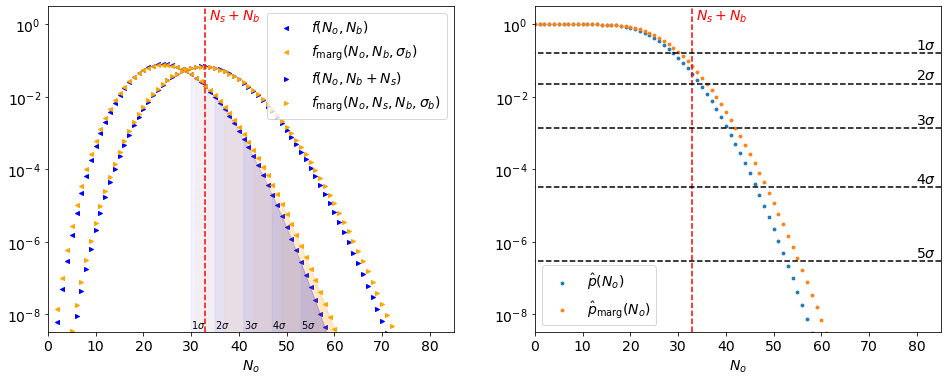

In [6]:
plot_compare_marg(Ns=8.23, Nb=24.65, db=1.4)